In [18]:
import numpy as np

# 加载单个文件
data = np.load('detection_result.npy')
print(data.shape)


(3, 400)


In [1]:
import numpy as np
import multiprocessing as mp
from functools import partial
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde
import itertools
import matplotlib.pyplot as plt
from gpr_module import GaussianProcessRegressor
from utills import outlieromit, save_results
from tqdm import tqdm

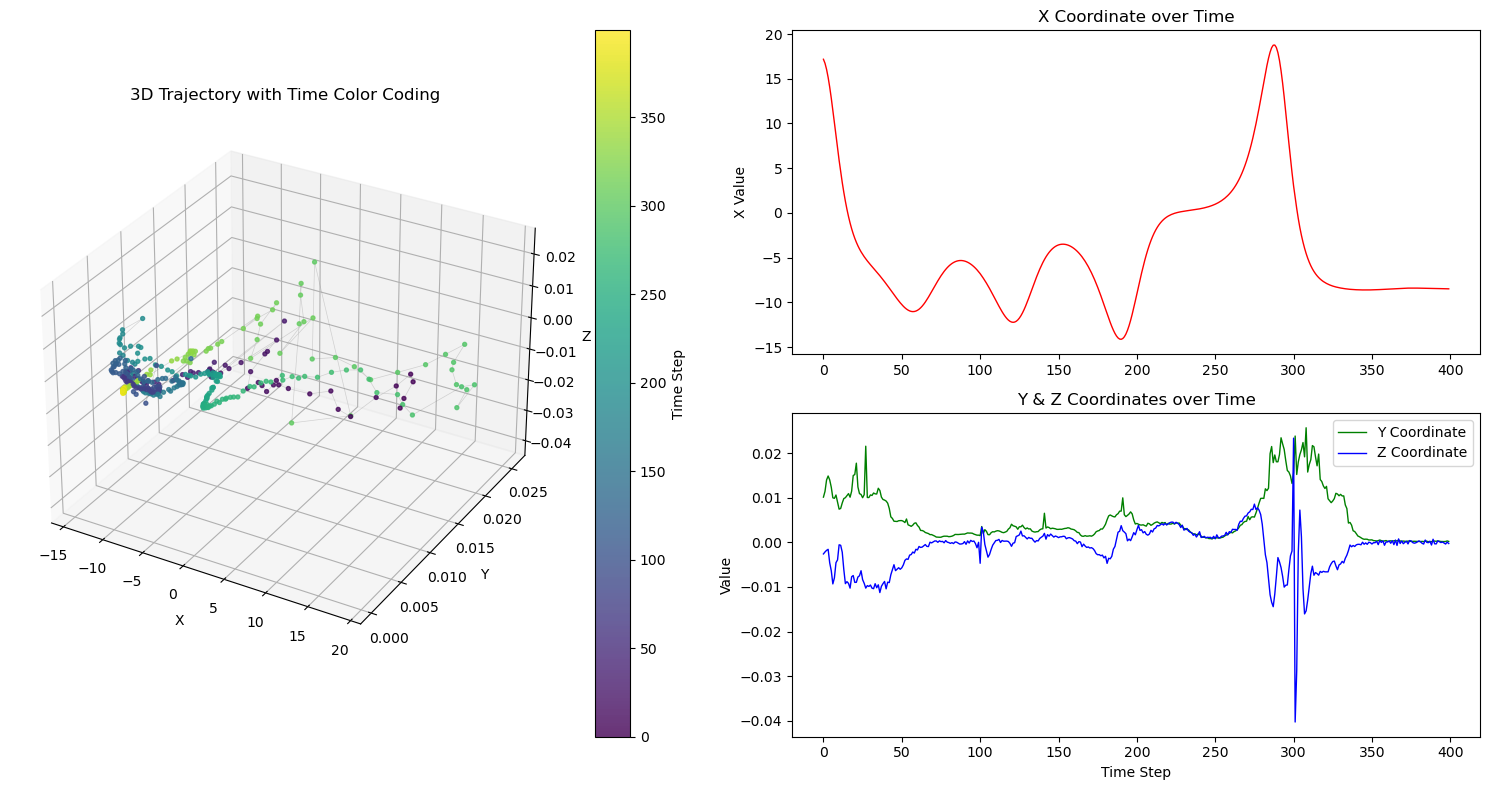

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成示例数据（假设已加载数据）
time_steps = np.arange(400)

# 创建画布和子图布局
fig = plt.figure(figsize=(15, 8), dpi=100)
gs = fig.add_gridspec(2, 2)

# 3D轨迹图
ax1 = fig.add_subplot(gs[:, 0], projection='3d')
sc = ax1.scatter(data[0], data[1], data[2], c=time_steps, 
                cmap='viridis', s=8, alpha=0.8)
ax1.plot(data[0], data[1], data[2], 'gray', lw=0.5, alpha=0.3)
ax1.set(xlabel='X', ylabel='Y', zlabel='Z',
       title='3D Trajectory with Time Color Coding')
fig.colorbar(sc, ax=ax1, label='Time Step')

# 各坐标轴时间序列
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(time_steps, data[0], 'r-', lw=1, label='X Coordinate')
ax2.set(title='X Coordinate over Time', ylabel='X Value')

ax3 = fig.add_subplot(gs[1, 1], sharex=ax2)
ax3.plot(time_steps, data[1], 'g-', lw=1, label='Y Coordinate')
ax3.plot(time_steps, data[2], 'b-', lw=1, label='Z Coordinate')
ax3.set(title='Y & Z Coordinates over Time', 
       xlabel='Time Step', ylabel='Value')
ax3.legend()

plt.tight_layout()
plt.show()

In [6]:
import itertools
L=4
D=15
combs = list(itertools.combinations(range(D), L))
np.random.shuffle(combs)

In [7]:
combs

[(5, 8, 11, 12),
 (2, 5, 9, 12),
 (0, 4, 12, 13),
 (1, 4, 6, 13),
 (2, 4, 9, 14),
 (1, 2, 6, 13),
 (1, 2, 6, 9),
 (1, 4, 8, 10),
 (2, 6, 11, 12),
 (4, 6, 12, 13),
 (2, 6, 7, 13),
 (6, 11, 13, 14),
 (1, 5, 10, 12),
 (5, 9, 10, 11),
 (8, 11, 12, 14),
 (4, 5, 11, 12),
 (4, 5, 10, 13),
 (0, 5, 11, 14),
 (3, 8, 12, 13),
 (2, 6, 9, 10),
 (2, 4, 10, 11),
 (5, 6, 9, 10),
 (1, 5, 12, 13),
 (4, 7, 11, 14),
 (1, 2, 5, 7),
 (0, 3, 6, 8),
 (1, 4, 8, 9),
 (0, 1, 9, 13),
 (0, 1, 3, 14),
 (1, 3, 5, 6),
 (1, 2, 9, 13),
 (0, 8, 9, 10),
 (1, 6, 7, 13),
 (4, 5, 12, 14),
 (3, 8, 10, 14),
 (0, 2, 11, 12),
 (1, 7, 10, 11),
 (0, 4, 8, 10),
 (0, 3, 6, 9),
 (3, 4, 7, 13),
 (1, 3, 4, 11),
 (3, 5, 7, 13),
 (2, 8, 9, 11),
 (3, 4, 5, 12),
 (2, 11, 12, 13),
 (1, 9, 11, 14),
 (4, 5, 6, 14),
 (1, 5, 6, 12),
 (1, 3, 7, 12),
 (1, 4, 5, 7),
 (1, 2, 3, 14),
 (1, 10, 11, 12),
 (3, 9, 12, 14),
 (2, 3, 4, 6),
 (1, 2, 4, 10),
 (1, 4, 6, 9),
 (0, 1, 11, 12),
 (2, 8, 9, 12),
 (2, 3, 7, 10),
 (0, 5, 7, 9),
 (2, 6, 7, 12),
 (2, 5

In [ ]:
from example_usage import *
print(NWnetwork(5,1,0.1)[0])
generate_coupled_lorenz()

[[0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
0.0005180835723876953
(4000, 15)


In [15]:
noise_strength=1e-4
record=generate_coupled_lorenz()
X = record + noise_strength * np.random.randn(*record.shape)
trainlength = 30  # 与MATLAB的trainlength=30对齐
timelag = 2400 - trainlength - 1  # 对齐MATLAB的timelag计算
xx = X[timelag+1:].T  # 从timelag+1开始切片，与MATLAB的xx=X(timelag+1:end,:)'一致
xx.shape

0.0011620521545410156


(15, 1630)

In [ ]:
combs = list(itertools.combinations(range(15), 4))
np.random.shuffle(combs)
selected_combs = combs[:600]
selected_combs
trainX = xx[list(comb), :trainlength-1].T 
# 选择600组组合

[(1, 2, 7, 14),
 (2, 3, 10, 13),
 (7, 8, 13, 14),
 (5, 6, 8, 14),
 (0, 2, 3, 4),
 (1, 5, 12, 14),
 (4, 6, 9, 10),
 (2, 4, 5, 12),
 (3, 6, 11, 12),
 (4, 7, 9, 11),
 (4, 7, 9, 14),
 (4, 9, 11, 14),
 (1, 4, 6, 9),
 (0, 1, 2, 7),
 (7, 9, 12, 13),
 (0, 3, 4, 12),
 (3, 4, 6, 13),
 (4, 5, 6, 11),
 (5, 7, 11, 14),
 (0, 6, 8, 14),
 (5, 9, 12, 14),
 (2, 4, 5, 10),
 (5, 6, 7, 12),
 (3, 5, 10, 14),
 (0, 3, 7, 10),
 (1, 5, 10, 11),
 (3, 4, 7, 13),
 (3, 5, 10, 13),
 (2, 8, 13, 14),
 (3, 4, 8, 9),
 (0, 1, 6, 13),
 (4, 7, 9, 13),
 (0, 1, 5, 8),
 (2, 3, 5, 13),
 (0, 6, 10, 11),
 (0, 4, 8, 14),
 (6, 8, 10, 14),
 (0, 1, 5, 11),
 (6, 7, 8, 13),
 (0, 3, 12, 14),
 (5, 6, 8, 11),
 (2, 10, 13, 14),
 (3, 9, 12, 13),
 (4, 7, 10, 11),
 (3, 5, 9, 13),
 (3, 8, 12, 13),
 (0, 10, 11, 14),
 (1, 3, 5, 14),
 (1, 5, 11, 14),
 (2, 5, 9, 13),
 (1, 3, 12, 13),
 (1, 6, 8, 11),
 (3, 6, 7, 12),
 (1, 2, 6, 8),
 (1, 3, 4, 12),
 (1, 6, 10, 11),
 (1, 3, 5, 7),
 (1, 6, 12, 13),
 (3, 7, 10, 14),
 (5, 6, 9, 10),
 (4, 5, 7, 13),
 (4,

In [ ]:
result_x = np.load('detection_result_x.npy')
result_y = np.load('detection_result_y.npy')
result_z = np.load('detection_result_z.npy')
record = np.load('record.npy')
actual_values_x = record[2400:2400 + 400, 0]  
predicted_values_x = result_x[0, :]
actual_values_y = record[2400:2400 + 400, 1] 
predicted_values_y = result_y[0, :]
actual_values_z = record[2400:2400 + 400, 2]  
predicted_values_z = result_z[0, :]
print(actual_values_x.shape)
print(predicted_values_x.shape)

(400,)
(400,)
